# **Final Assignment**
## *Generalized Gradient-Bandit Algorithm*
### MATH 514 Operations Research
### Course Instructor: Dr. Rustem Takhanov
### Done by: Jamil Zhumabek

Let $P_1, P_2, ..., P_k$ be unknown probability distributions on R (bandits) and $q_*(a) = E_{X ∼ P_a}[X]$.

Let $ψ : R -> R$ be a monotonically growing function with a continuous derivative and $α > 0$ is a stepsize.
The Generalized Gradient Bandit Algorithm (GGBA) algorithm is an algorithm that updates the vector $H_t = [H_t(a)]^k_a=1$
through time $t = 1, 2, 3, ...$ by the following rule

$H_{t+1} = H_t + αg_t$,

where

$g_t = [ (R_t - R̄_t) * (ψ'(H_t(a)) / ψ(H_t(a))) * (I[A_t = a] - π_t(a)) ]^k_a=1$,

and A_t is sampled according to $P[A_t = a] ∝ ψ(H_t(a))$ and $R_t$ is sampled according to $P_{A_t}$.
That is, we have

$π_t(a) = P[A_t = a] = ψ(H_t(a)) / Σ^k_{x=1} ψ(H_t(x))$

Note that for $ψ(x) = e^x$ we obtain the standard Gradient Bandit Algorithm. Let us introduce an objective function to maximize:

$E[R_t] = Σ_a π_t(a)q_*(a)$.

By construction, the maximum of the latter function over $[H_t(a)]^k_a=1$ is attained when $π_t(a^*) = 1$ and $a^* = arg max_{a∈[1,...,k]} q_*(a)$.

 #### Note, that in our case $\psi$ function is defined as:

 Smooth ReLU:

 $\psi(x) = \ln(1 + e^x)$.

 Smooth ReLU squared:

 $\psi(x) = \ln^2(1 + e^x)$.

Smooth ReLU cubed:

 $\psi(x) = \ln^3(1 + e^x)$.

## The problem solution will be defined as follows:
1) For instance, we will plot smooth functions to see the difference in growth rate. What are the differences between them? How close it is to the $e^x$?

2) We will run the algorithm for each function separately, visualizing the following data:
**%Optimal decisions vs Time Steps, Average % of optimal actions over all steps for different alphas, Average Reward vs Time Steps, Average % of optimal actions over all steps for different alphas.**

3) For the first smooth function we will describe each step separately, for other the code snippets will be compiled into one, with the brief conclusion provided.  

4) For simplicity we will take the values of learning rate alpha as the 1 divided by power of 2-- [1, 2, 4, 8, 16, 32].

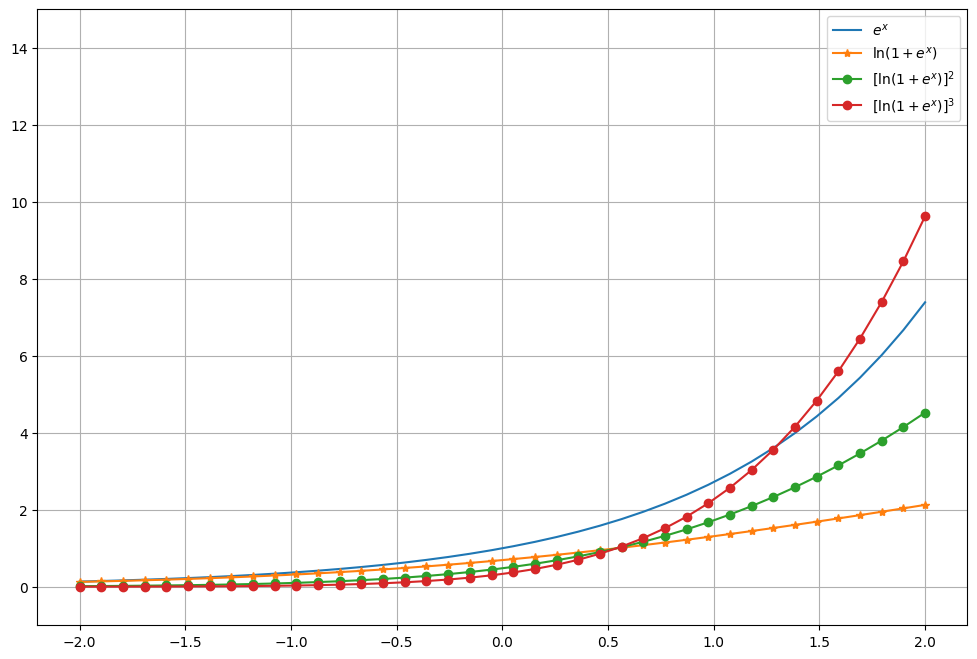

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Define the Smooth ReLU function
def smooth_relu(x):
    return np.log(1 + np.exp(x))

# Define the Smooth ReLU squared function
def smooth_relu_squared(x):
    return np.log(1 + np.exp(x))**2

# Define the Smooth ReLU cubed function
def smooth_relu_cubed(x):
    return np.log(1 + np.exp(x))**3

x = np.linspace(-2, 2, 40)  # Adjusted for a better view of the smooth functions
plt.figure(figsize=(12, 8))

plt.plot(x, np.exp(x), label=r'$e^x$')
plt.plot(x, smooth_relu(x), marker='*', label=r'$\ln(1+e^x)$')
plt.plot(x, smooth_relu_squared(x), marker='o', label=r'$[\ln(1+e^x)]^2$')
plt.plot(x, smooth_relu_cubed(x), marker='o', label=r'$[\ln(1+e^x)]^3$')

plt.ylim(-1, 15)  # Adjusted y-scale for visibility of all curves
plt.legend()
plt.grid()
plt.show()


This plot demonstrates how adding powers to the logarithmic transformation of the ReLU function steepens its growth rate, making it closer to the standard exponential function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the smooth functions

def smooth_relu(x):
    return np.log(1 + np.exp(x))

def smooth_relu_squared(x):
    return np.log(1 + np.exp(x))**2

def smooth_relu_cubed(x):
    return np.log(1 + np.exp(x))**3

# Here we define derivatives of the smooth functions

def smooth_relu_dx(x):
    return np.exp(x) / (1 + np.exp(x))  # Derivative of ln(1 + e^x)

def smooth_relu_squared_dx(x):
    return 2 * np.log(1 + np.exp(x)) * np.exp(x) / (1 + np.exp(x))  # Derivative of [ln(1 + e^x)]^2

def smooth_relu_cubed_dx(x):
    return 3 * np.log(1 + np.exp(x))**2 * np.exp(x) / (1 + np.exp(x))  # Derivative of [ln(1 + e^x)]^3

def gradient_bandit(T_steps, alpha, psi, psi_derivative, bl=0):

    #initialize all preferences to zero
    H_arr = np.zeros(10)

    optchoice_arr = np.zeros(T_steps)
    r_arr = np.zeros(T_steps)
    r_mean = 0
    for n in range(T_steps):

        #choose bandit according to softmax(H_arr)
        prob = psi(H_arr)/sum(psi(H_arr))

        # compute psi_derivative
        psi_grad = psi(H_arr)/psi_derivative(H_arr)

        k = np.random.choice(10, p = prob)

        #get reward from the k^th bandit
        r = np.random.normal((k + 1.) / 10., 1) + bl

        #update mean total reward and preferences
        r_mean += (1. / (n+1)) * (r - r_mean)

        #update preferences H_arr
        for i in range(10):
            if (i == k):
                H_arr[i] += alpha * (r - r_mean) * psi_grad[i] * (1 - prob[i])
            else:
                H_arr[i] -= alpha * (r - r_mean) * psi_grad[i] * prob[i]

        #increment optchoice_arr if the action was optimal (i.e. the bandit "10" (k=9) with the highest expectation value of 1.0)
        if (k == 9):
            optchoice_arr[n] += 1

        #add reward to an r_arr
        r_arr[n] += r

    return [optchoice_arr, r_arr]


In this piece of code we aim to evaluate how different learning rates affect the learning and decision-making process of the bandit algorithm, i.e. how often it makes optimal decisions and the rewards it accumulates over time.

 This can help determine the best learning rate for balancing exploration (trying out new or less chosen options) and exploitation (choosing the best-known option).

## $1. \psi(x) = \ln(1 + e^x)$
 #### Note, that running this piece of code takes ~7 minutes.

In [ ]:
T_steps = 1000
N_runs = 1000
#alpha = 1/32, 1/16, 1/8, 1/4, 1/2, 1
alpha = np.array([1/(2**n) for n in range (5,-1,-1)])
N_alpha = alpha.size
optchoice_arr = np.zeros((N_alpha, T_steps))
r_arr = np.zeros((N_alpha, T_steps))

#average over N_runs
for i in range(N_alpha):
    for _ in range(N_runs): # general gradient_bandit()
        [optchoice_arr[i], r_arr[i]] = np.add([optchoice_arr[i], r_arr[i]], gradient_bandit(T_steps, alpha[i], smooth_relu, smooth_relu_dx))

optchoice_arr /= N_runs
r_arr /= N_runs

#### Below we visualize the performance of the gradient bandit algorithm across different learning rates (alpha) over a series of time steps.

 The graph demonstrates that an intermediate learning rate (
𝛼
=
0.250 and
𝛼
=
0.500) optimally balances between learning speed and stability, leading to the highest and most consistent selection of optimal actions.

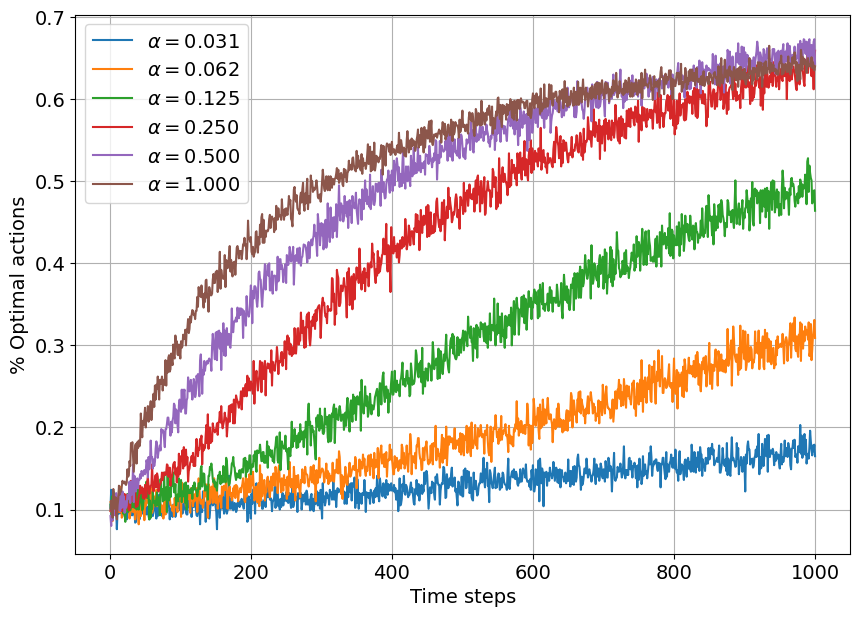

In [ ]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(N_alpha):
    alpha_str = '{0:.3f}'.format(alpha[i])
    ax.plot(np.arange(1, T_steps+1), optchoice_arr[i], label = r'$\alpha = $' + alpha_str)

ax.legend()
ax.set_xlabel('Time steps')
ax.set_ylabel('% Optimal actions')
plt.grid()
plt.show()

Below we aim to visualize the average reward over time for different learning rates (𝛼).

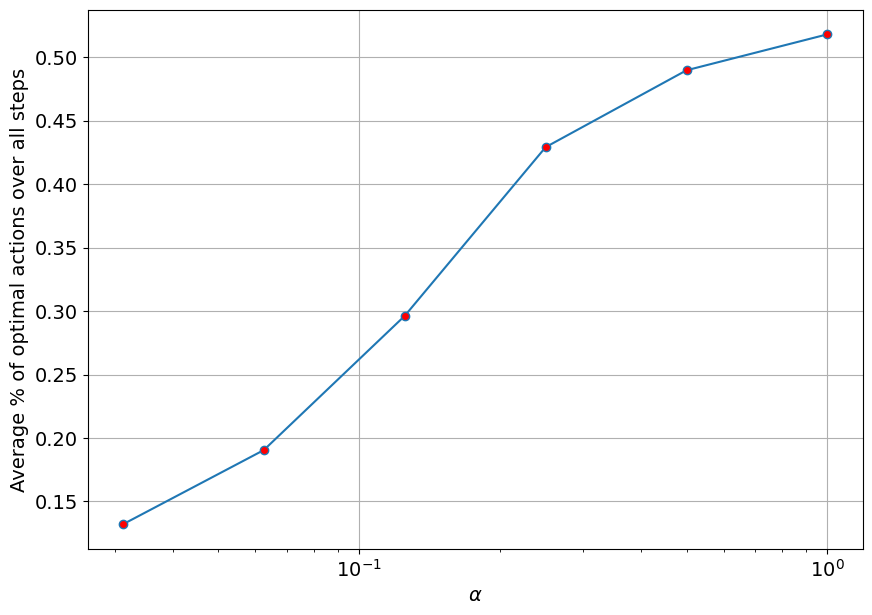

In [ ]:
final_opt = np.average(optchoice_arr, axis=1)
fig3, ax3 = plt.subplots(figsize=(10, 7))
ax3.plot(alpha, final_opt, marker='o', markerfacecolor='red')
ax3.set_xlabel(r'$\alpha$')
ax3.set_ylabel('Average % of optimal actions over all steps')
plt.grid()
plt.xticks()
plt.xscale("log")
plt.show()

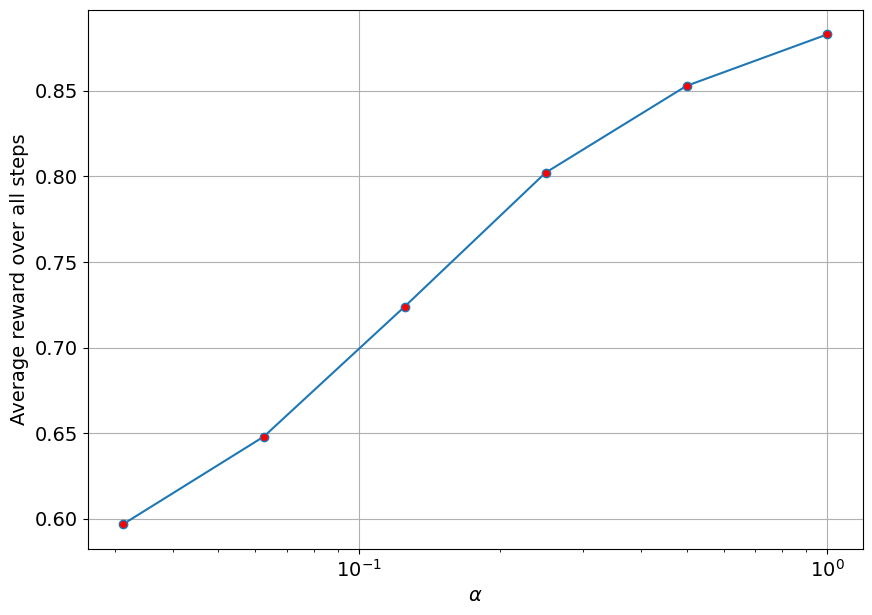

In [ ]:
#Hewe we illustrate the average reward over all steps vs. the value of parameter alpha
final_reward = np.average(r_arr, axis=1)
fig4, ax4 = plt.subplots(figsize=(10, 7))
ax4.plot(alpha, final_reward,  marker='o', markerfacecolor='red')
ax4.set_xlabel(r'$\alpha$')
ax4.set_ylabel('Average reward over all steps')
plt.grid()
plt.xscale("log")
plt.show()

## $2. \psi(x) = \ln^2(1 + e^x)$
 #### Note, that running this piece of code takes ~8 minutes.

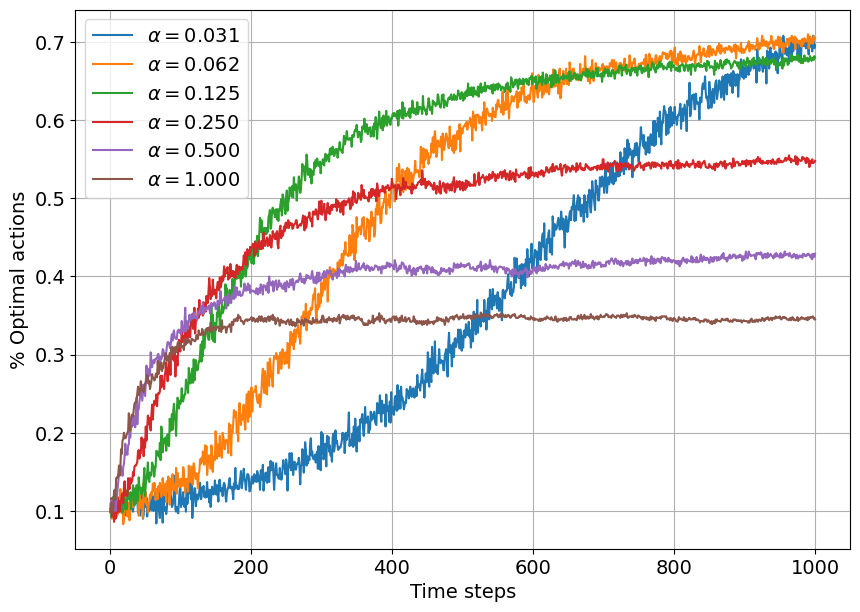

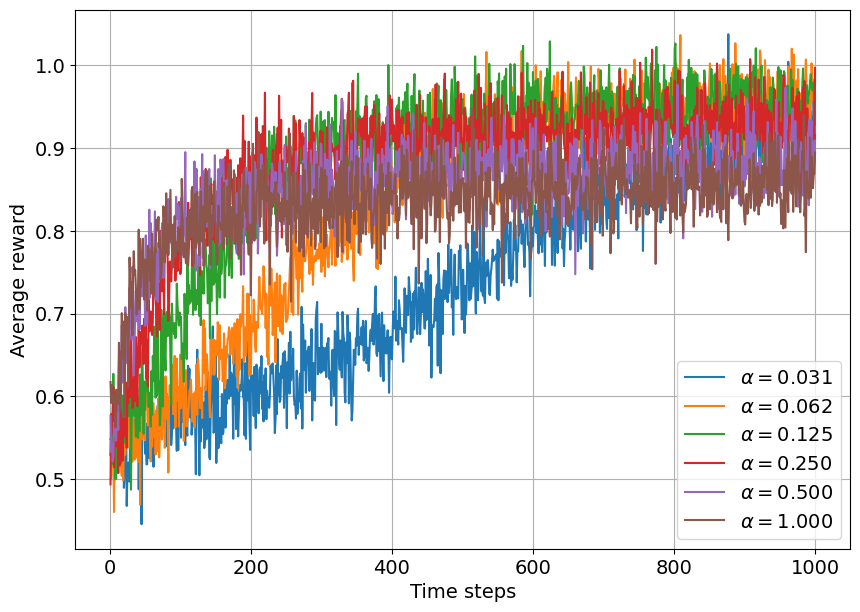

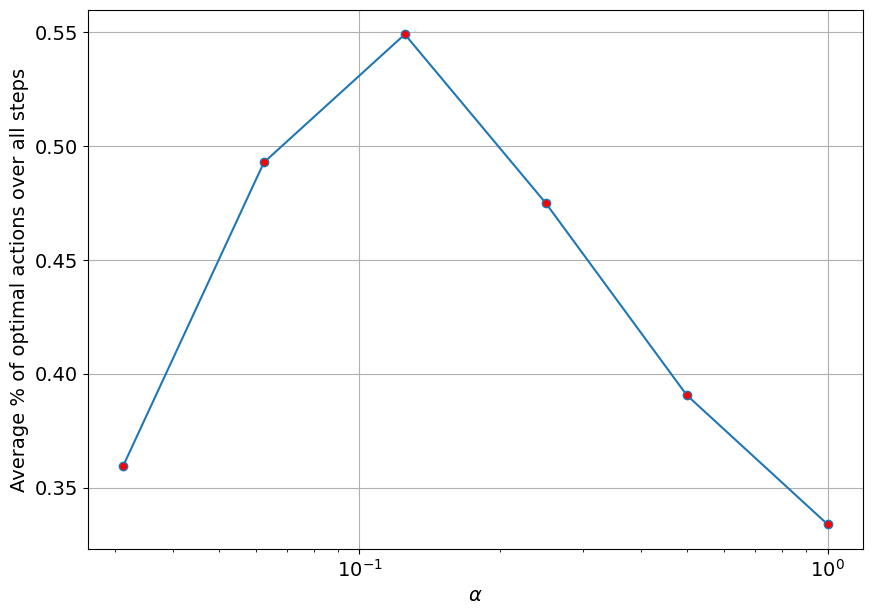

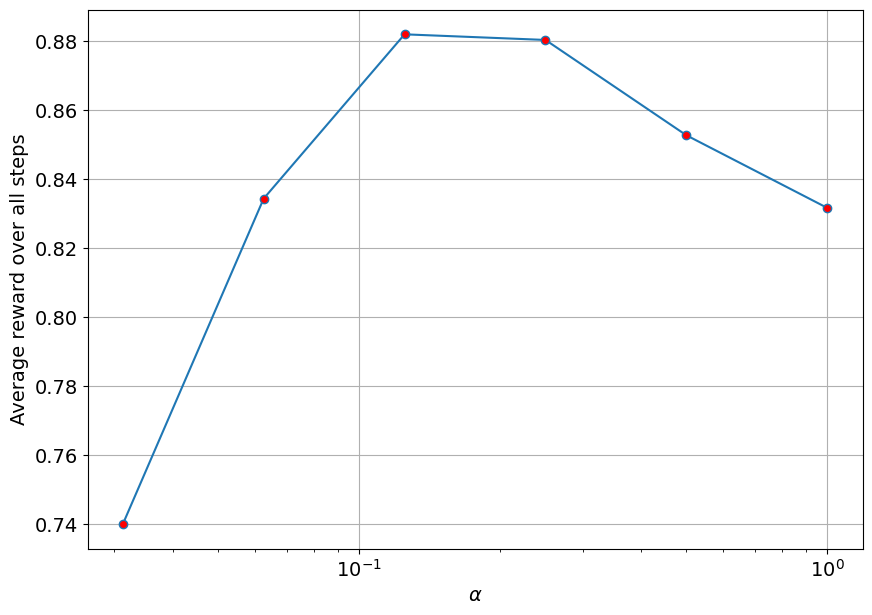

In [ ]:
T_steps = 1000
N_runs = 1000
#alpha = 1/32, 1/16, 1/8, 1/4, 1/2, 1
alpha = np.array([1/(2**n) for n in range (5,-1,-1)])
N_alpha = alpha.size
optchoice_arr = np.zeros((N_alpha, T_steps))
r_arr = np.zeros((N_alpha, T_steps))

#average over N_runs
for i in range(N_alpha):
    for _ in range(N_runs):#change
        [optchoice_arr[i], r_arr[i]] = np.add([optchoice_arr[i], r_arr[i]], gradient_bandit(T_steps, alpha[i], smooth_relu_squared, smooth_relu_squared_dx))

optchoice_arr /= N_runs
r_arr /= N_runs

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(N_alpha):
    alpha_str = '{0:.3f}'.format(alpha[i])
    ax.plot(np.arange(1, T_steps+1), optchoice_arr[i], label = r'$\alpha = $' + alpha_str)

ax.legend()
ax.set_xlabel('Time steps')
ax.set_ylabel('% Optimal actions')
plt.grid()
plt.show()

#Draw average reward
fig2, ax2 = plt.subplots(figsize=(10, 7))

for i in range(N_alpha):
    alpha_str = '{0:.3f}'.format(alpha[i])
    ax2.plot(np.arange(1, T_steps+1), r_arr[i], label = r'$\alpha = $' + alpha_str)

ax2.legend()
ax2.set_xlabel('Time steps')
ax2.set_ylabel('Average reward')
plt.grid()
plt.show()

#Draw the average % of optimal actions over all steps vs. the value of parameter alpha
final_opt = np.average(optchoice_arr, axis=1)
fig3, ax3 = plt.subplots(figsize=(10, 7))
ax3.plot(alpha, final_opt, marker='o', markerfacecolor='red')
ax3.set_xlabel(r'$\alpha$')
ax3.set_ylabel('Average % of optimal actions over all steps')
plt.grid()
plt.xticks()
plt.xscale("log")
plt.show()

#Draw the average reward over all steps vs. the value of parameter alpha
final_reward = np.average(r_arr, axis=1)
fig4, ax4 = plt.subplots(figsize=(10, 7))
ax4.plot(alpha, final_reward,  marker='o', markerfacecolor='red')
ax4.set_xlabel(r'$\alpha$')
ax4.set_ylabel('Average reward over all steps')
plt.grid()
plt.xscale("log")
plt.show()

##Conclusion

These graphs demonstrate the impact of learning rate `α` on the performance of a gradient bandit algorithm. Some values of `α` (around 0.125 to 0.500) achieve higher percentages of optimal actions and peak average rewards, performing an optimal trade-off between exploration and exploitation. Very low `α = 0.031 and high `α = 1.000` learning rates result in lower performance, with inadequate adaptation and excessive variability, respectively.

 The optimal α maximizes both the selection of optimal actions and the accumulation of rewards, highlighting its critical role in tuning the algorithm for best performance.



## $3. \psi(x) = \ln^3(1 + e^x)$
 #### Note, that running this piece of code takes ~10 minutes.

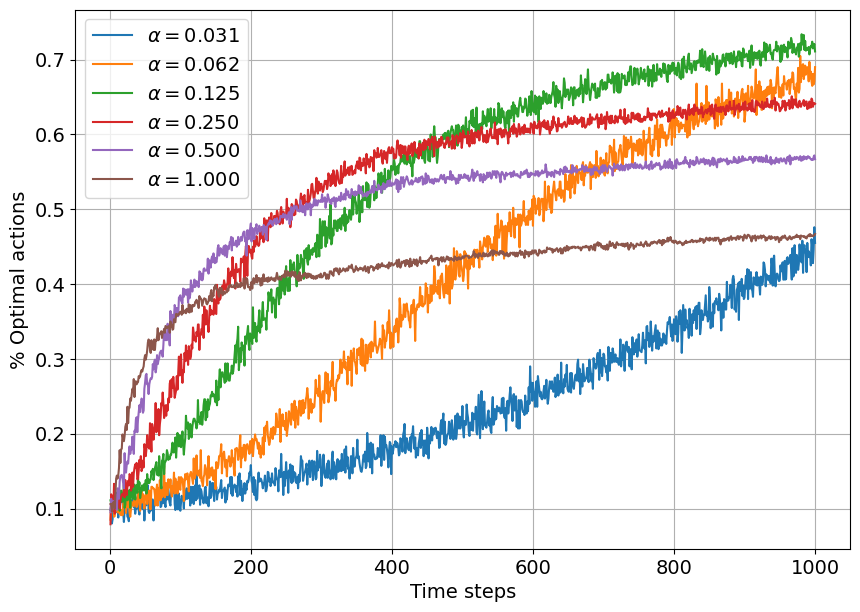

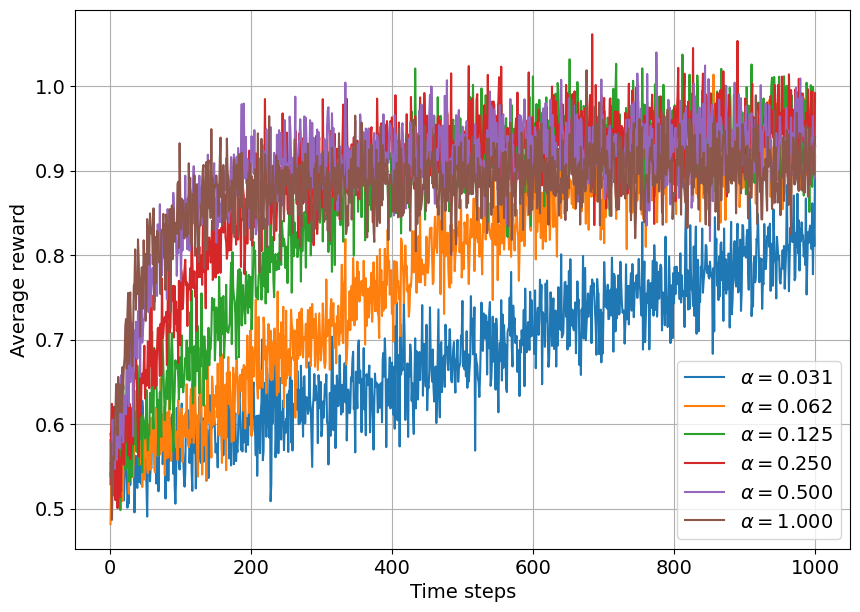

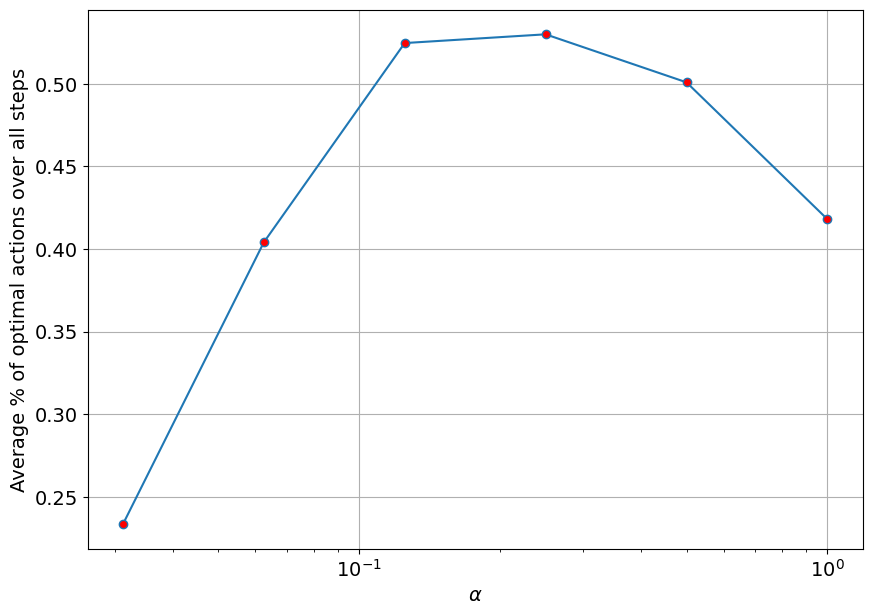

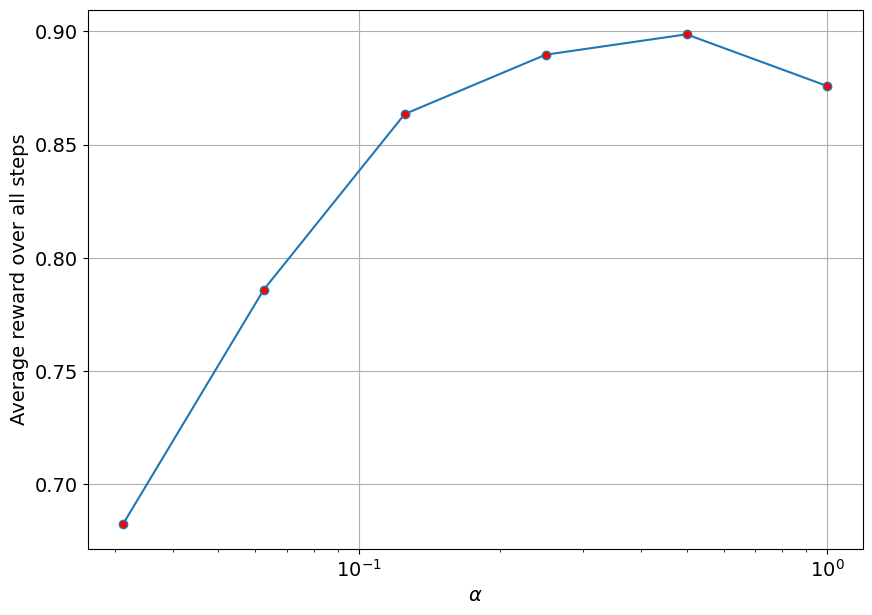

In [ ]:
T_steps = 1000
N_runs = 1000
#alpha = 1/32, 1/16, 1/8, 1/4, 1/2, 1
alpha = np.array([1/(2**n) for n in range (5,-1,-1)])
N_alpha = alpha.size
optchoice_arr = np.zeros((N_alpha, T_steps))
r_arr = np.zeros((N_alpha, T_steps))

#average over N_runs
for i in range(N_alpha):
    for _ in range(N_runs):#change
        [optchoice_arr[i], r_arr[i]] = np.add([optchoice_arr[i], r_arr[i]], gradient_bandit(T_steps, alpha[i], smooth_relu_cubed, smooth_relu_cubed_dx))

optchoice_arr /= N_runs
r_arr /= N_runs

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(N_alpha):
    alpha_str = '{0:.3f}'.format(alpha[i])
    ax.plot(np.arange(1, T_steps+1), optchoice_arr[i], label = r'$\alpha = $' + alpha_str)

ax.legend()
ax.set_xlabel('Time steps')
ax.set_ylabel('% Optimal actions')
plt.grid()
plt.show()

#Draw average reward
fig2, ax2 = plt.subplots(figsize=(10, 7))

for i in range(N_alpha):
    alpha_str = '{0:.3f}'.format(alpha[i])
    ax2.plot(np.arange(1, T_steps+1), r_arr[i], label = r'$\alpha = $' + alpha_str)

ax2.legend()
ax2.set_xlabel('Time steps')
ax2.set_ylabel('Average reward')
plt.grid()
plt.show()

#Draw the average % of optimal actions over all steps vs. the value of parameter alpha
final_opt = np.average(optchoice_arr, axis=1)
fig3, ax3 = plt.subplots(figsize=(10, 7))
ax3.plot(alpha, final_opt, marker='o', markerfacecolor='red')
ax3.set_xlabel(r'$\alpha$')
ax3.set_ylabel('Average % of optimal actions over all steps')
plt.grid()
plt.xticks()
plt.xscale("log")
plt.show()

#Draw the average reward over all steps vs. the value of parameter alpha
final_reward = np.average(r_arr, axis=1)
fig4, ax4 = plt.subplots(figsize=(10, 7))
ax4.plot(alpha, final_reward,  marker='o', markerfacecolor='red')
ax4.set_xlabel(r'$\alpha$')
ax4.set_ylabel('Average reward over all steps')
plt.grid()
plt.xscale("log")
plt.show()

##Conclusion:
We see, that the worst performance outcome of Average Reward over Time Steps by alpha equals to 1/32, and the alpha equals to 1/16 reaches a slightly better performance. The best performance is achieved by alpha equals to 1/4 and 1/8, making it hard to distinguish the more preferable one.
α=1/4 has also the best average % of optimal actions over all time steps.
We see also, that α=1/4 and α=1/8 have the best % of optimal actions over all time steps.